# Co-appearance data in novels: Dream of Red Mansion

In [1]:
import seaborn as sns
import rpy2.robjects as robjects
import pandas as pd
import numpy as np

In [2]:
robjects.r['load']("data/novel/dream.RData")

'dream'


In [3]:
data = robjects.r['dream']

data_array = []
for i in range(data.ncol):
    row = []
    for j in range(data.nrow):
        row.append(int(data[i][j]))
    data_array.append(row)
np_data_array = np.array(data_array)

data_dict = []
for index,name in enumerate(data.names):
    current = {}
    current['_name'] = name
    for j in range(data.nrow):
        current['appears_in_scene_'+str(j+1).zfill(3)] = data_array[index][j]
    data_dict.append(current)
df = pd.DataFrame.from_dict(data_dict)
df

,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_466,appears_in_scene_467,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475
0,chap80,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,贾代善,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,贾代儒,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,贾代修,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,贾敷,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,贾敬,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,贾赦,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(np_data_array.shape)
np_data_array

(375, 475)


array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
array_characters = np.delete(np_data_array, (0), axis=0)
array_characters

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
co_occurence = np.dot(array_characters,array_characters.T)
print(co_occurence.shape)
co_occurence

(374, 374)


array([[4, 1, 1, ..., 0, 0, 0],
       [1, 2, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

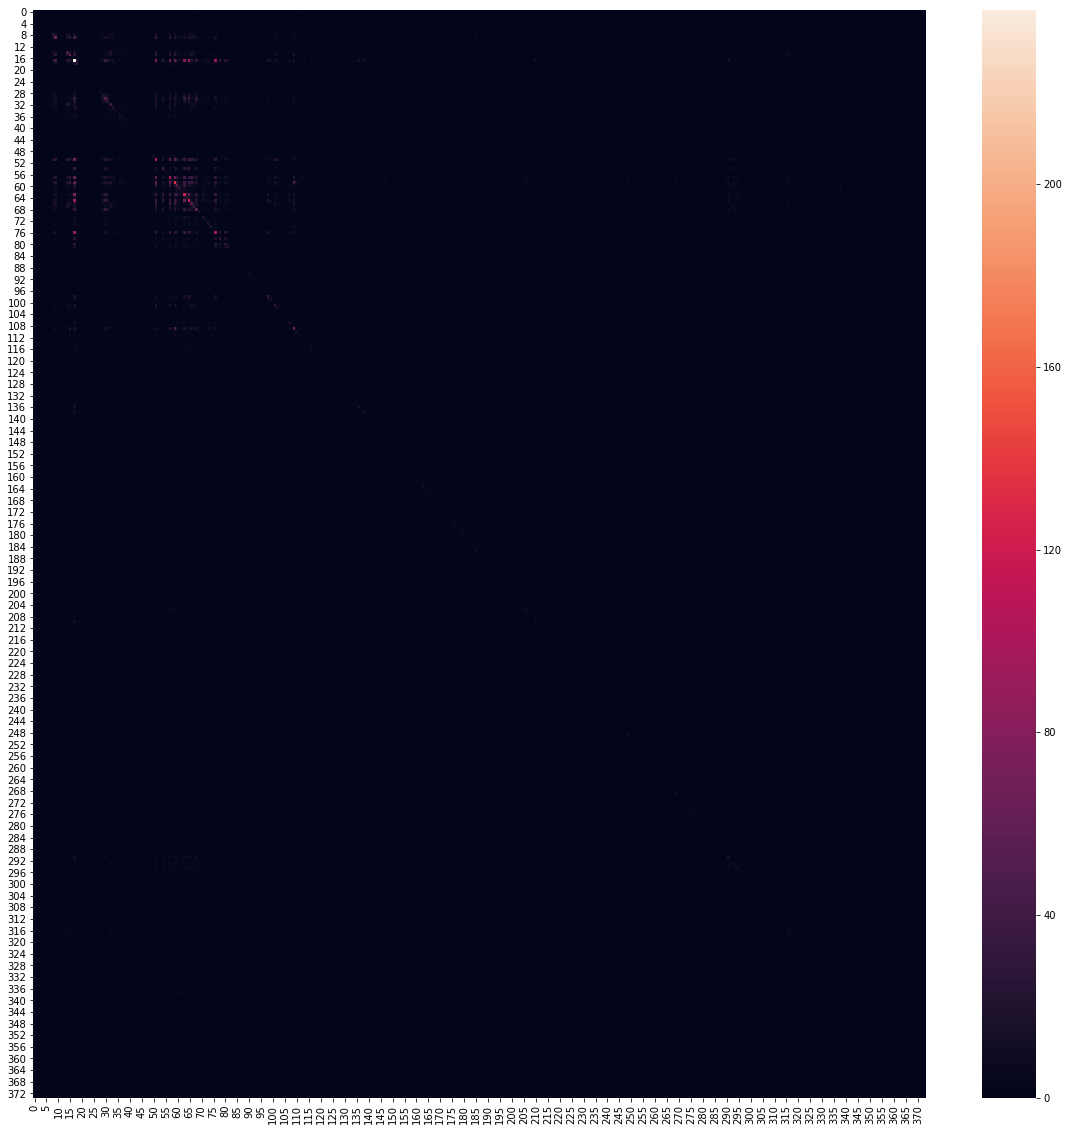

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
sns.heatmap(data=co_occurence)

In [8]:
co_occurence.sum(axis=0)

array([  34,   37,   22,   22,   84,   48,   22,   42,  294,  627,   32,
         48,   48,   48,  414,  564,   69, 1595,  243,   32,   11,   84,
         48,   59,   48,   48,   59,   48,  109,  285,  555,  342,  309,
        217,  129,   67,  202,  118,   74,   63,   63,   48,   48,   48,
         48,   48,   48,   17,   17,    0,  120, 1026,    0,   34,  428,
         69,    0,  995,   76, 1161,  479,  239,  129,  910,  251,  870,
        581,  385,  535,   67,    3,  160,   58,  185,   97,   12,  790,
         23,  244,   24,  274,  202,   34,   10,   21,   39,    7,   20,
          7,    0,   88,   40,   39,   25,   40,   15,   12,    6,  258,
        106,   24,  272,  125,   33,   42,    9,    0,  112,    0,  526,
         85,   87,   29,   58,   35,   21,  126,   62,    0,    5,   19,
         48,   48,   13,   56,    2,    8,    0,    6,   26,    0,    9,
          8,    0,    0,   50,  114,    0,   88,   51,   21,   33,   46,
         21,   21,    0,    0,   58,   36,   12,   

In [9]:
np_data_array_without_chap80 = np.delete(np_data_array, (0), axis=0)
print(min(np_data_array_without_chap80.sum(axis=0))) # All scenes have at least 1 character
np_data_array_without_chap80.sum(axis=0)

1


array([ 3,  2,  6,  5,  3,  4,  3,  3,  5,  3, 22,  7, 15, 13, 11,  8, 13,
        5,  2,  5,  2,  1,  6,  2,  5,  2,  5,  5,  2,  6,  5,  5,  4,  3,
        2,  3,  4,  4, 13,  3,  4,  3,  9,  4,  3,  6,  7,  3,  5, 48, 34,
        5,  3,  6,  3,  2,  3,  4,  1,  3,  9,  2,  3,  4,  6,  3,  4,  3,
        2,  6,  3,  6,  9,  1,  3,  2,  3,  1,  2,  2,  3,  5,  3,  4,  3,
        3, 10,  9,  5,  4,  4,  6,  4, 11, 15, 21,  5, 12, 21, 14,  3,  6,
        3,  2,  6,  8,  2,  2,  4,  2,  4,  5, 20,  1,  3, 10,  4,  2,  2,
        5,  6,  2,  3,  3,  8, 11,  5,  6,  7,  4,  6,  3,  2,  5,  3,  5,
        5,  8,  4,  5,  5,  3,  3,  2, 11,  2,  3,  2,  2,  3,  3,  3,  6,
        6,  2,  3,  5,  6,  3,  4,  4,  7,  5,  2,  4,  5,  9,  5,  3, 19,
       16,  7,  3,  4,  5,  6,  3, 12,  4,  2,  3,  6,  2,  7, 10,  2,  6,
       10,  4,  4,  2,  2,  2,  2,  5,  2,  4,  6,  6,  8,  3, 11,  5,  4,
        5,  4,  4,  7,  3, 17,  8,  2, 10,  6, 13,  9,  4,  7,  3,  7,  8,
        4,  6,  3,  7, 12

In [10]:
np_data_array_without_chap80 = np.delete(np_data_array, (0), axis=0)
print(min(np_data_array_without_chap80.sum(axis=1))) # 55 characters never appear.... weird
np_data_array_without_chap80.sum(axis=1)

0


array([  4,   2,   1,   1,   5,   1,   1,   3,  25,  69,   3,   1,   1,
         1,  44,  70,   5, 238,  30,   5,   1,   4,   1,   2,   1,   1,
         2,   1,  10,  23,  55,  33,  34,  20,  11,   3,  18,   7,   3,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   0,  13, 109,
         0,   1,  46,   8,   0, 106,   9, 134,  53,  26,  12, 121,  24,
       118,  56,  37,  57,  12,   1,  21,  11,  23,  17,   1, 101,   4,
        30,   3,  32,  18,   4,   1,   2,   5,   2,   3,   2,   0,   8,
         3,   3,   4,   4,   2,   2,   1,  31,  12,   1,  35,  12,   3,
         3,   1,   0,  11,   0,  68,  13,   8,   3,   8,   2,   1,  11,
         5,   0,   1,   3,   1,   1,   3,   4,   1,   1,   0,   1,   2,
         0,   1,   1,   0,   0,   5,  14,   0,  10,   4,   2,   2,   3,
         1,   1,   0,   0,   6,   5,   1,   1,   1,   1,   1,   0,   1,
         1,   1,   2,   1,   0,   1,   2,  12,   5,   6,   4,   4,   2,
         2,   1,   2,   1,   2,   4,   4,   4,   5,   2,   7,   

In [11]:
print("Characters that never appears")
nodes = []
for index,row in df.iterrows():
    if index != 0:
        nodes.append({
            'id':row['_name'],
            'group':1
        })
        
characters_that_never_appear = []
for index, value in enumerate(np_data_array_without_chap80.sum(axis=1)):
    if value == 0:
        print(index, nodes[index]['id'])
        characters_that_never_appear.append(index)
    

Characters that never appears
49 贾葛
52 史鼐
56 王子胜
89 抱琴
106 X.儿
108 文杏
118 同喜
127 靛儿
130 小吉祥儿
133 炒豆儿
134 小舍儿
137 焦大
145 双瑞
146 双寿
154 小玄儿
160 杏奴
208 余信
209 余信家的
216 秦业
218 冯唐
241 二丫头
244 胡老爷
246 李公子
247 云光
251 吴天佑
252 吴贵妃
253 卜固修
254 山子野
257 昭容
258 彩缤
259 花母
273 胡斯来
274 鲍太医
280 傅试
281 傅秋芳
283 茗玉
284 王君效
286 金彩
292 邢忠
296 梅翰林
298 良儿
303 赵国基
304 单大娘
305 祝妈
306 田妈
307 叶妈
310 夏婆子
315 偕鸾
322 天文生
323 喜鸾
324 四姐
327 周太监
328 小霞
329 翠云
334 文花


In [12]:
#Double Check
print('史鼐')
df.ix[52+1]
for a in df.ix[52+1]:
    if a != 0:
        print(a)

史鼐
史鼐


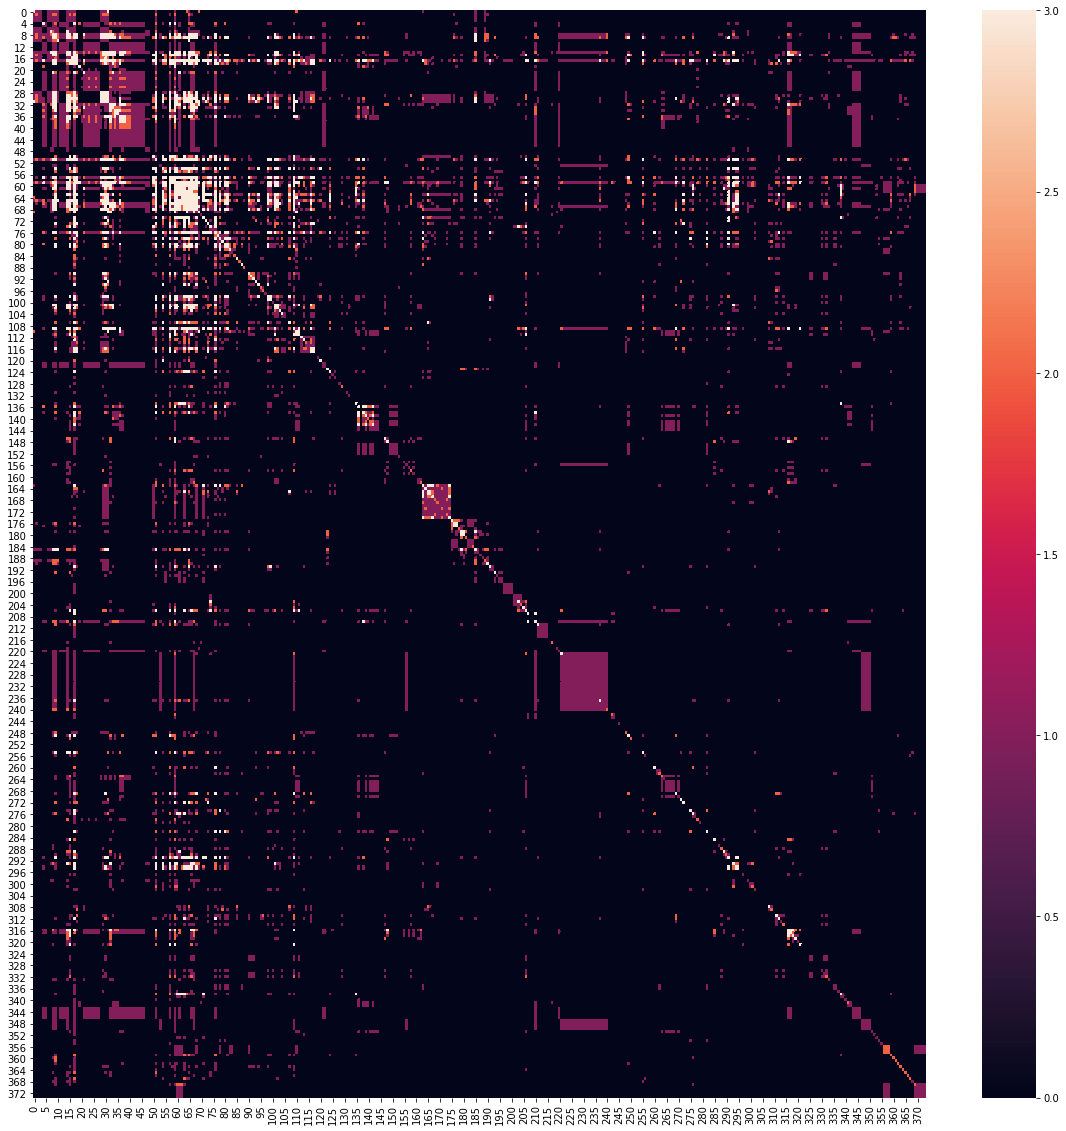

In [13]:
n = co_occurence.shape[1]
for i in range(n):
    for j in range(n):
        if co_occurence[i][j]>3:
            co_occurence[i][j] = 3
plt.figure(figsize=(20,20))
sns.heatmap(data=co_occurence)

In [14]:
np.fill_diagonal(co_occurence,0)
co_occurence.sum(axis=0) # 56 characters have no connections, who is the one that appears alone?

array([ 30,  35,  21,  21,  79,  47,  21,  39, 176, 266,  29,  47,  47,
        47, 214, 235,  63, 421, 137,  27,  10,  80,  47,  57,  47,  47,
        57,  47,  79, 151, 209, 170, 166, 138, 106,  64, 154, 106,  71,
        61,  61,  47,  47,  47,  47,  47,  47,  16,  16,   0,  90, 301,
         0,  33, 158,  57,   0, 300,  59, 396, 187, 160,  90, 248, 121,
       248, 242, 215, 202,  51,   2,  99,  39, 109,  68,  11, 271,  19,
       133,  21, 133, 122,  30,   9,  19,  34,   5,  17,   5,   0,  79,
        37,  36,  20,  34,  13,  10,   5, 125,  64,  23, 121,  94,  30,
        39,   8,   0,  85,   0, 231,  65,  70,  26,  48,  33,  20,  99,
        55,   0,   4,  16,  47,  47,  10,  51,   1,   7,   0,   5,  24,
         0,   8,   7,   0,   0,  44,  86,   0,  71,  46,  19,  31,  43,
        20,  20,   0,   0,  49,  31,  11,  11,  11,  11,   5,   0,  11,
        33,  11,  31,  11,   0,  13,  19,  70,  29,  52,  36,  33,  23,
        29,  19,  22,  19,  23,  29,  11,  28,  18,   4,  40,  1

In [15]:
print("Characters that appear alone")
for index,value in enumerate(co_occurence.sum(axis=0)):
    if value == 0:
        if index not in characters_that_never_appear:
            print(index)
            print(nodes[index])
            characters_that_never_appear.append(index)

Characters that appear alone
245
{'id': '金哥', 'group': 1}


In [16]:
# Create JSON
nodes = []
for index,row in df.iterrows():
    if index != 0:
#         if index not in characters_that_never_appear:
            nodes.append({
                'id':row['_name'],
                'group':1
            })

In [17]:
# nodes

In [18]:
# df['_name'].value_counts()

In [19]:
links = []
n = co_occurence.shape[1]
for i in range(n):
    for j in range(n):
        if i > j:
            if co_occurence[i][j] > 0:
                links.append({
                    'source': nodes[i]['id'],
                    'target': nodes[j]['id'],
                    'value': int(co_occurence[i][j])
                })

In [20]:
# links

In [21]:
nodes = [i for j, i in enumerate(nodes) if j not in characters_that_never_appear]

In [22]:
import json
output = {
    'nodes':nodes,
    'links':links
}
with open('data/novel/co_occurence.json', 'w') as outfile:
    json.dump(output, outfile)